<h1>This is my first attempt at creating an iPython notebook and using python for data viz!</h1>

I have used python for data <em>science</em> before but not for visualizations. Let's see how this goes!

The dataset is from NYC Open Data (https://data.cityofnewyork.us) and is titled "Directory of Eateries"
You can find the data set here:https://data.cityofnewyork.us/Recreation/Directory-of-Eateries/8792-ebcp

The data is stored in JSON format and one of the main interest points of the set is that it holds the <em>name</em> and <em>category</em> of every place that serves food in NYC. Other attributes include the opening and closing date of the eatery, as well as the physical address and a text description of where the eatery is located, relative to its surroundings.

In [37]:
#first, let's import neccessary packages
#running this cell will make these three packages available for every subsequent cell
import numpy as np
import pandas as pd
import seaborn as sb

#the following line will enable inline plotting in the notebook
%matplotlib inline

So far we've imported 3 main packages: numpy, pandas and seaborn. Numpy and pandas give python access to better data structures to store data in, and access to a lot of scientific functions and methods. Seaborn is a visualization library that works tightly with numpy and pandas; it's based on matplotlib and is supposed to make more aesthetic visualizations than most other python libraries.

Thus in the rest of the document we will do the following
<ol>
    <li>Access the JSON-formatted data</li>
    <li>Use numpy and pandas to make a dataframe readable by Seaborn</li>
    <li>Play with Seaborn!</li>

In [14]:
#so for step 1, let's access and collect the data
import json

#open the file and store all the contents in a list
with open('DPR_Eateries_001.json', 'r') as file:
    eat_list = json.load(file)
    
#We now have access to the data for eateries in NYC and we can do things like:
print("There are " + str(len(eat_list)) + " eateries in NYC")
print("A typical entry looks like this: " + str(eat_list[7]))

There are 249 eateries in NYC
A typical entry looks like this: {'name': 'Central Park Food Cart', 'location': 'East 84 Street, pedestrian path, west side of East Drive', 'park_id': 'M010', 'start_date': '2015-07-29', 'end_date': '2019-12-31', 'description': None, 'permit_number': 'M10-84-ED-C', 'phone': None, 'website': None, 'type_name': 'Food Cart'}


In [25]:
#for step 2, let's make a dataframe to use in step 3

#since our data is a list of dicts pandas lets us make one immediately
eat_dframe = pd.DataFrame(eat_list)

#using our dataframe we get a neat table where each row is an entry in the previous list
print("The columns are the following: ")
for column in eat_dframe.columns.values:
    print(column)

#let's select only the categories that we want to visualize later
eat_dframe2 = eat_dframe[['name', 'type_name']]
print(eat_dframe2)

The columns are the following: 
                                                 name               type_name
0                              Central Park Food Cart               Food Cart
1                              Central Park Food Cart               Food Cart
2                              Central Park Food Cart               Food Cart
3                              Central Park Food Cart               Food Cart
4                              Central Park Food Cart               Food Cart
5                              Central Park Food Cart               Food Cart
6                              Central Park Food Cart               Food Cart
7                              Central Park Food Cart               Food Cart
8                              Central Park Food Cart               Food Cart
9                              Central Park Food Cart               Food Cart
10                             Central Park Food Cart               Food Cart
11                             C

In [27]:
#there are quite a few duplicates so let's clean this up
clean_dframe = eat_dframe2.drop_duplicates()
print(clean_dframe)

                                                 name               type_name
0                              Central Park Food Cart               Food Cart
13                             Battery Park Food Cart               Food Cart
14                           Riverside Park Food Cart               Food Cart
17            P.S. 143 Armstrong Playground Food Cart               Food Cart
18                             Astoria Park Food Cart               Food Cart
19                      Frank O'connor Park Food Cart               Food Cart
20             Flushing Meadows Corona Park Food Cart               Food Cart
27                       Van Cortlandt Park Food Cart               Food Cart
28           Williamsbridge Oval Playground Food Cart               Food Cart
29                          Pelham Bay Park Food Cart               Food Cart
30                           St. James Park Food Cart               Food Cart
31                          Windmuller Park Food Cart           

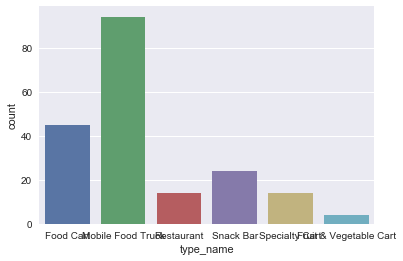

In [38]:
#so now that we have a clean dataframe without duplicates we can move on to step 3
#let's see how many eateries are in each categories!


ax = sb.countplot(x='type_name', data=clean_dframe)

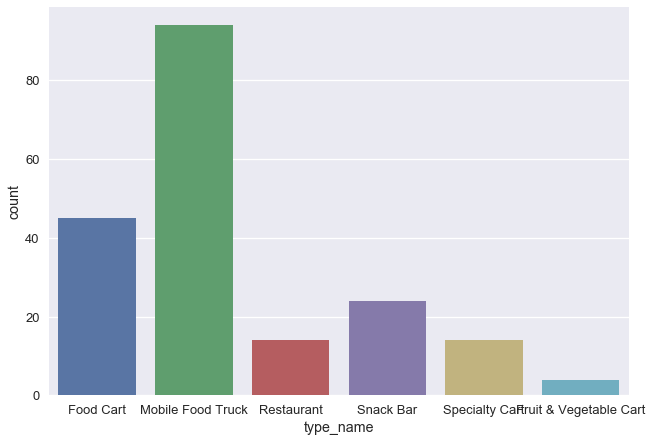

In [47]:
#right now the figure is too small so let's adjust that
sb.set_context("talk")
ax = sb.countplot(x='type_name', data=clean_dframe)

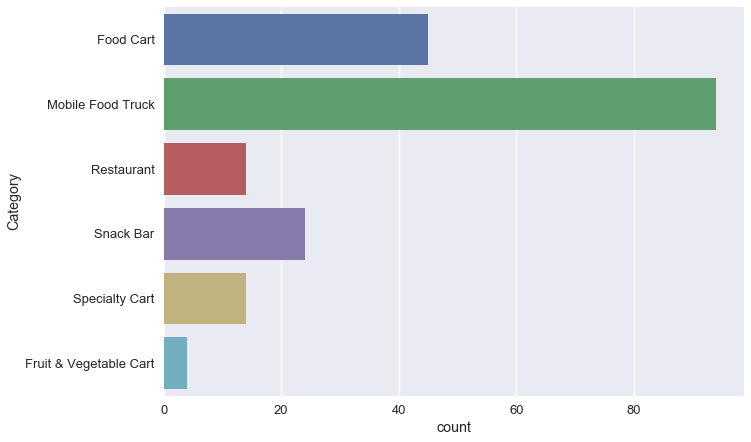

In [57]:
#those last two categories are overlapping so let's try tilting the graph
#let's also try labeling the axes something better
sb.set_context("talk")
clean_dframe.columns = ['Name', 'Category']
ax = sb.countplot(y='Category', data=clean_dframe)

We've produced a nice bargraph that tells us that the most popular form of eatery in NYC is a food truck. Of course, this is followed by the iconic manhattan food cart and surprisingly, restaurants are the second least popular category.